# CTD profiles - minimal example

___

📥 Download [`CTD profiles - minimal example.ipynb`](https://github.com/NPIOcean/kval/raw/master/docs/source/examples/notebooks/CTD_profiles_minimal_example.ipynb)

___

**In this notebook**

- Load multiple `.cnv` files containing shipboard profiles from a SeaBird CTD.
- Quick overview and basic plots.

In [5]:
pwd

'/home/oyvindl/work/code/python/kval/docs/source/examples/notebooks'

In [2]:
# Import the ctd module from kval.data
from kval.data import ctd 
# Set the plotting backed so we can interact with figures
%matplotlib widget 

## Load data from `.cnv` files into a single xarray Dataset

**Specify a directory** `cnv_dir` where we have `.cnv` files collected from a SBE CTD.


____

***NOTE:*** *Loading the data in this manner will load* all *the* `.cnv` *files in the directory. Make sure* `cnv_dir/` *only contains the files you want to include.*

___

***NOTE:*** *In this case, the* `.cnv` *files contain pressure-gridded data. It is also possible to load ungridded profiles - profiles will then be pressure gridded within kval.*

In [3]:
cnv_dir = ('../../../../tests/test_data/'
           'sbe_files/sbe911plus/atwain_cruise_ctds/')

**Load all** `.cnv` **files** into a single xarray
Dataset - the object we will work with and ultimately export to netCDF.

In [4]:
ds = ctd.ctds_from_cnv_dir(cnv_dir)

Found 3 .cnv files in  "../../../../tests/test_data/sbe_files/sbe911plus/atwain_cruise_ctds/".
NOTE: It seems the input data already binned -> using preexisting binning.


Joining profiles together:   0%|          | 0/3 [00:00<?, ?it/s]

The xarray Dataset `ds` should contain 1-D and 2-D fields gridded on pressure (`PRES`) and time (`TIME`). 

When available, metadata such as serial numbers and calibration data have been parsed into variable attributes. The `PROCESSING` variable should include a description of the processing steps and a python script that can be used to reproduce the processing we do here (we add to these fields as we apply methods to the dataset).
   

## Have a look at the data


**Take a first  look at the dataset**



To have a look around, run `ds` in a cell and browse (if you are running the notebook interactively). Click the ⛃ and 🗎 symbols on the right to display data and metadata.   

In [6]:
ds

<xarray.Dataset> Size: 93kB
Dimensions:            (TIME: 3, PRES: 527)
Coordinates:
  * PRES               (PRES) float64 4kB 3.0 4.0 5.0 6.0 ... 527.0 528.0 529.0
  * TIME               (TIME) float64 24B 1.743e+04 1.743e+04 1.743e+04
Data variables:
    TEMP               (TIME, PRES) float64 13kB nan 6.362 6.367 ... nan nan nan
    PTEMP              (TIME, PRES) float64 13kB nan 6.362 6.367 ... nan nan nan
    CNDC               (TIME, PRES) float64 13kB nan 34.68 34.69 ... nan nan nan
    PSAL               (TIME, PRES) float64 13kB nan 34.98 34.98 ... nan nan nan
    SIGTH              (TIME, PRES) float64 13kB nan 27.49 27.49 ... nan nan nan
    CHLA_fluorescence  (TIME, PRES) float64 13kB nan 1.39 1.293 ... nan nan nan
    SBE_FLAG           (TIME, PRES) float64 13kB nan 0.0 0.0 0.0 ... nan nan nan
    STATION            (TIME) <U5 60B 'AT285' 'AT286' 'AT287'
    LATITUDE           (TIME) float64 24B 80.11 80.07 80.04
    LONGITUDE          (TIME) float64 24B 9.875 10.38 10.75
    CRUISE             <U27 108B '!! CRUISE (Not assigned) !!'
    PROCESSING         object 8B None
Attributes:
    binned:            1 decibars (SBE software)
    source_file:       E.g. AT285.HEX, AT285.XMLCON -> AT285.CNV
    history:           2017-09-24 to 2017-09-24: Data collection.\n2018-07-23...
    instrument_model:  Sea-Bird SBE 9
    featureType:       profile

### Quick map

Show a quick map of the profile locations. May or may not be useful depending on your dataset.

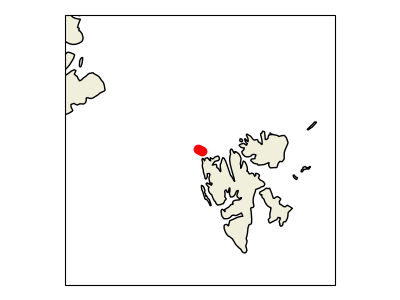

In [7]:
ctd.map(ds)

### Contour plots 

The `ctd.contour()` function displays two contour plots. You can interactively change which variables are displayed and adjust the axes.

In [8]:
ctd.contour(ds)

### Profile plots

Have a quick look at individual profiles. Interactively select profiles and variables.

In [9]:
ctd.inspect_profiles(ds)